In [1]:
import numpy as np
from pandas import DataFrame as df

import autoregressiveFunctions as ar
import importlib

In [13]:
importlib.reload(ar) # if autoregressiveFunctions.py is modified 

<module 'autoregressiveFunctions' from 'c:\\Users\\alber\\python_projects\\fundamentals_of_interest_rates\\autoregressiveFunctions.py'>

# Autoregressive (AR) Processes

An autoregressive (AR) process is a type of time series model where the current value of the series depends linearly on its past values and a random shock (innovation). 

#### General AR(p)
A general AR(p) process depends on the last \(p\) lags:

$$
y_t = a_0 + a_1 y_{t-1} + a_2 y_{t-2} + \dots + a_p y_{t-p} + \varepsilon_t
$$

- The order \(p\) indicates how many past values influence the current value. 

- $a_0$ is a constant term  
- $a_1$ is an autoregressive coefficient  
- $\varepsilon_t$ is a white noise error term





In [24]:
a = np.array([0.1, 0.2, 0.3, 0.4, -0.2])
p = a.size

data = ar.generate_ar(steps=100_000, paths=10, a=a, start=0, dist='normal', error_var=1)

100%|██████████| 99996/99996 [00:00<00:00, 235999.92it/s]

10 different AR(4) processes of 99998 steps have been generated with increments following normal distribution


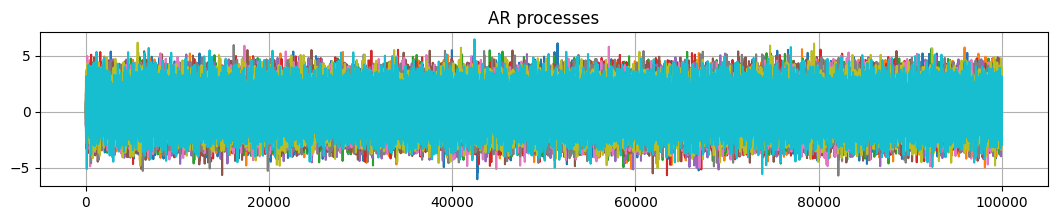

In [25]:
ar.plot_paths(data, size=(13,2))

### Let's check stationarity

In general, an AR(p) is stationary if the roots of the characteristic polynomial lie outside the unit circle.

For an autoregressive process AR(p), the characteristic polynomial is defined as:

$$
\phi(z) = 1 - a_1 z - a_2 z^2 - \dots - a_p z^p
$$

So, it is stationary if:

$$
|z_i| > 1 \quad \forall i
$$

This condition ensures that the effect of past shocks decays over time and the process does not diverge.

As a consequence, we have that:

$$
\mathbb{E}[y_t] = \frac{a_0}{1 - a_1 - \dots - a_p}
$$

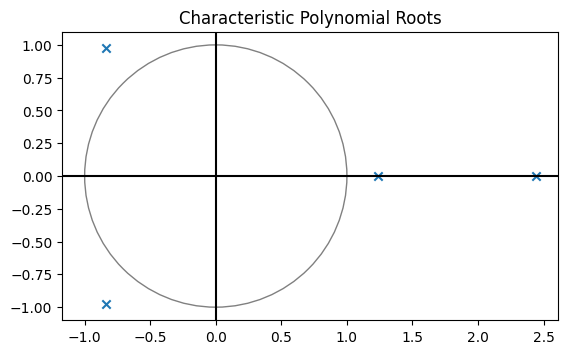

The process is stationary!


In [26]:
roots = ar.characteristic_poly_roots(a, show_plot=True)

if np.all((np.absolute(roots)) > 1):
    print('The process is stationary!')

Let's see if the sample mean coverges to the theoretic mean as the number of steps increases

In [19]:
a = np.array([0.1, 0.2, 0.3, 0.4, -0.2])

Expectation = (a[0]/(1 - np.sum(a[1:])))

steps_list = [100, 1_000, 10_000, 100_000, 1_000_000]
data_list = []

for steps in steps_list:
    data = ar.generate_ar(steps=steps, paths=1, a=a, disable_progress=True)
    sample_mean = np.mean(data, axis=0).mean()
    data_list.append(sample_mean)

df_means = df({'steps': steps_list,'sample_mean': data_list})

print(df_means)
print(f'The theoretic mean is {Expectation:6f}')


     steps  sample_mean
0      100     0.187565
1     1000     0.224758
2    10000     0.298207
3   100000     0.319135
4  1000000     0.333653
The theoretic mean is 0.333333


In [27]:
coefficients = ar.fit_ar_ols(data, p=1)
df(coefficients).head()

,0,1,2,3,4,5,6,7,8,9
0,0.193870,0.206884,0.201315,0.211108,0.191030,0.204215,0.215638,0.209527,0.206419,0.209018
1,0.382752,0.388095,0.397080,0.387880,0.389175,0.375689,0.378876,0.387516,0.386944,0.384174


In [18]:
std_residuals = ar.get_residuals(data = data, coefficients = coefficients, p = 1, std_residuals = True)

100%|██████████| 999999/999999 [00:04<00:00, 232897.67it/s]
